## Introducing DataFrame

- Pandas is built on NumPy and Matplotlib
- When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.

    - head() returns the first few rows (the “head” of the DataFrame).
    - info() shows information on each of the columns, such as the data type and number of missing values.
    - shape returns the number of rows and columns of the DataFrame. [is attributes! Not methods]
    - describe() calculates a few summary statistics for each column.

In [1]:
import pandas as pd
import datetime as dt

Data source: https://www.kaggle.com/luiscorter/netflix-original-films-imdb-scores

In [2]:
example = pd.read_csv('Pandas_example.csv', index_col=0)
Netflix = pd.read_csv('NetflixOriginals.csv')

In [4]:
example.head(3)

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.4
RU,Russia,Moscow,17.100,143.5
IN,India,New Delhi,3.286,1252.0


In [5]:
example.info

<bound method DataFrame.info of          country    capital    area  population
BR        Brazil   Brasilia   8.516      200.40
RU        Russia     Moscow  17.100      143.50
IN         India  New Delhi   3.286     1252.00
CH         China    Beijing   9.597     1357.00
SA  South Africa   Pretoria   1.221       52.98>

In [6]:
example.shape

(5, 4)

In [7]:
example.describe()

,area,population
count,5.000000,5.000000
mean,7.944000,601.176000
std,6.200557,645.261454
min,1.221000,52.980000
25%,3.286000,143.500000
50%,8.516000,200.400000
75%,9.597000,1252.000000
max,17.100000,1357.000000


In [45]:
Netflix.head(3)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian


In [63]:
Netflix.dtypes

Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object

In [65]:
# Fix date format to standard format

Netflix["Premiere"] = pd.to_datetime(Netflix["Premiere"])

#print(dt.datetime.strptime(Netflix["Premiere"], "%B %d, %Y")).strftime("%Y-%M-%D") Wrong!!!!!!

In [66]:
Netflix.head(3)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian


## Parts of DataFrame
- To better understand DataFrame objects, it's useful to know that they consist of three components, stored as attributes:

    - values: A two-dimensional NumPy array of values.
    - columns: An index of columns: the column names.
    - index: An index for the rows: either row numbers or row names.
- You can usually think of indexes as a list of strings or numbers, though the pandas Index data type allows for more sophisticated options

In [9]:
example.values # This is attributes, so you do not need ()!

array([['Brazil', 'Brasilia', 8.516, 200.4],
       ['Russia', 'Moscow', 17.1, 143.5],
       ['India', 'New Delhi', 3.286, 1252.0],
       ['China', 'Beijing', 9.597, 1357.0],
       ['South Africa', 'Pretoria', 1.221, 52.98]], dtype=object)

In [10]:
example.columns

Index(['country', 'capital', 'area', 'population'], dtype='object')

In [11]:
example.index

Index(['BR', 'RU', 'IN', 'CH', 'SA'], dtype='object')

## Sorting

In [12]:
example.sort_values("population") # Remember sort_values not sort_value

,country,capital,area,population
SA,South Africa,Pretoria,1.221,52.98
RU,Russia,Moscow,17.100,143.50
BR,Brazil,Brasilia,8.516,200.40
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00


In [13]:
## Sort by multiple columns
example.sort_values(["population", "area"], ascending = [True, False])

,country,capital,area,population
SA,South Africa,Pretoria,1.221,52.98
RU,Russia,Moscow,17.100,143.50
BR,Brazil,Brasilia,8.516,200.40
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00


## Subsetting by column

In [14]:
example["country"]

BR          Brazil
RU          Russia
IN           India
CH           China
SA    South Africa
Name: country, dtype: object

In [15]:
# Selecting multiple columns: 
    # Outer brackets: responsible for subsetting the DataFrame
    # Inner square brackets: creating a list of column names to subset.
example[["country","area"]]

,country,area
BR,Brazil,8.516
RU,Russia,17.100
IN,India,3.286
CH,China,9.597
SA,South Africa,1.221


In [16]:
# Break it down by parts
cols_to_subset = ["country","area"]
example[cols_to_subset]

,country,area
BR,Brazil,8.516
RU,Russia,17.100
IN,India,3.286
CH,China,9.597
SA,South Africa,1.221


## Subsetting by Rows

In [17]:
# The most common way to do this is by creating a logical condition to filter against
example["area"] > 3

BR     True
RU     True
IN     True
CH     True
SA    False
Name: area, dtype: bool

In [18]:
example[example["area"] > 3]

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.4
RU,Russia,Moscow,17.100,143.5
IN,India,New Delhi,3.286,1252.0
CH,China,Beijing,9.597,1357.0


## Subsetting based on multiple conditions

In [20]:
more_than_pop_3 = example["population"] > 300
more_than_area_5 = example["area"] > 5
example[more_than_pop_3 & more_than_area_5]

,country,capital,area,population
CH,China,Beijing,9.597,1357.0


In [21]:
is_in_certain_city = example["capital"].isin(["Beijing","Moscow"])
example[is_in_certain_city]

,country,capital,area,population
RU,Russia,Moscow,17.100,143.5
CH,China,Beijing,9.597,1357.0


## New columns

In [22]:
# adding a new column 
example["pop_per_k"] = example["population"] /1000
print(example["pop_per_k"])

BR    0.20040
RU    0.14350
IN    1.25200
CH    1.35700
SA    0.05298
Name: pop_per_k, dtype: float64


## Summary Statistics
 - .agg(): custom summary stats
 - .cumsum(): cumulative sum
 - .cummax()
 - .cummin()
 - .cumprod()

In [ ]:
"""
While pandas and NumPy have tons of functions, sometimes, you may need a different function to summarize your data.

The .agg() method allows you to apply your own custom functions to a DataFrame
    , as well as apply functions to more than one column of a DataFrame at once, making your aggregations super-efficient. For example,
"""

df['column'].agg(function)

In [ ]:
# Import NumPy and create custom IQR function
import numpy as np
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
# If you are calling more than 1 function, then you will need to add square brackets!
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median])) 

In [7]:
print(Netflix.groupby("Genre")['Runtime'].sum())

Genre
Action              756
Action comedy       506
Action thriller      82
Action-adventure    121
Action-thriller     359
                   ... 
War                 221
War drama           291
War-Comedy          122
Western             350
Zombie/Heist        148
Name: Runtime, Length: 115, dtype: int64


In [6]:
print(Netflix.groupby("Genre").agg({'Runtime':'sum'}))

                  Runtime
Genre                    
Action                756
Action comedy         506
Action thriller        82
Action-adventure      121
Action-thriller       359
...                   ...
War                   221
War drama             291
War-Comedy            122
Western               350
Zombie/Heist          148

[115 rows x 1 columns]


## Drop duplicates 

In [ ]:
# DataFrame.drop_duplicates(subset="column_name")
vet_vistis.drop_duplicates(subset="name")

In [ ]:
# Dropping multiple columns
vet_vistis.drop_duplicates(subset=["name","breed"])

## Counting
- This can use to count rows by category.

In [ ]:
unique_dogs["bread"].value_counts()

In [ ]:
unique_dogs["bread"].value_counts(sort= True)

In [ ]:
# Can count proportion of total
unique_dogs["bread"].value_counts(normalize= True)

## Grouped summary statistics

In [ ]:
# Pandas_DF.groupby("column")["counted_column"].Function()
    # This will calculate dog's weight_kg mean by color!
dog.groupby("color")["weight_kg"].mean()

In [ ]:
dog.groupby(["color","bread"])["weight_kg"].mean()

## Multiple grouped summaries

In [ ]:
dogs.groupby("color")["weight_kg"].agg([min, max, sum])

In [ ]:
# if DataFrame is under numpy 
import numpy as np

sales_stats = sales.groupby("type")["weekly_sales"].agg([np.min, np.max, np.mean, np.median])

## Pivot table

In [ ]:
dog.groupby("color")["weight_kg"].mean()

# Is the same as 
dog.pivot_table(values = "weight_kg",
               index = "color")

In [ ]:
# if we want a different statistics then we can do :

import numpy as np
dogs.pivot_table(values = "weight_kg",
               index = "color",
                aggfunc= np.median)

In [ ]:
# Multiple statistics 
dogs.pivot_table(values = "weight_kg",
               index = "color",
                aggfunc= [np.median, np. mean]) # does not need quotation mark!

-- group by two variables --

In [ ]:
dog.groupby(["color","bread"])["weight_kg"].mean()

# is the same as:
    # pass the second column to columns
dog.pivot_table(values = "weight_kg",
               index = "color",
                columns = "breed", 
               fill_value = 0, # this is the default value set for NaN
                margins = True # The sum by rows and columns (does not include NaNs)
               ) 

## Explicit indexes

In [6]:
Netflix.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [7]:
Netflix.index

RangeIndex(start=0, stop=584, step=1)

In [9]:
Netflix.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [21]:
Netflix["Genre"].value_counts(sort = True)

Documentary             159
Drama                    77
Comedy                   49
Romantic comedy          39
Thriller                 33
                       ... 
Family/Comedy-drama       1
Animation/Superhero       1
Anime / Short             1
Horror anthology          1
Psychological horror      1
Name: Genre, Length: 115, dtype: int64

## Setting a column as the index - makes subsetting simpler
- Index value are just data
-  indexes violates "tidy data" principles


In [12]:
Netflix_ind = Netflix.set_index("Genre")
print(Netflix_ind)

                                                             Title  \
Genre                                                                
Documentary                                        Enter the Anime   
Thriller                                               Dark Forces   
Science fiction/Drama                                      The App   
Horror thriller                                     The Open House   
Mystery                                                Kaali Khuhi   
...                                                            ...   
Concert Film                 Taylor Swift: Reputation Stadium Tour   
Documentary            Winter on Fire: Ukraine's Fight for Freedom   
One-man show                               Springsteen on Broadway   
Documentary              Emicida: AmarElo - It's All For Yesterday   
Documentary               David Attenborough: A Life on Our Planet   

                                Premiere  Runtime  IMDB Score  \
Genre                   

In [14]:
# if you want to undo what tyou have done:
Netflix_ind.reset_index()

,Genre,Title,Premiere,Runtime,IMDB Score,Language
0,Documentary,Enter the Anime,"August 5, 2019",58,2.5,English/Japanese
1,Thriller,Dark Forces,"August 21, 2020",81,2.6,Spanish
2,Science fiction/Drama,The App,"December 26, 2019",79,2.6,Italian
3,Horror thriller,The Open House,"January 19, 2018",94,3.2,English
4,Mystery,Kaali Khuhi,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Concert Film,Taylor Swift: Reputation Stadium Tour,"December 31, 2018",125,8.4,English
580,Documentary,Winter on Fire: Ukraine's Fight for Freedom,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,One-man show,Springsteen on Broadway,"December 16, 2018",153,8.5,English
582,Documentary,Emicida: AmarElo - It's All For Yesterday,"December 8, 2020",89,8.6,Portuguese


In [13]:
Netflix_ind.reset_index(drop = True) # This will remove the column that you set as index before

,Title,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,"August 21, 2020",81,2.6,Spanish
2,The App,"December 26, 2019",79,2.6,Italian
3,The Open House,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,"December 8, 2020",89,8.6,Portuguese


In [16]:
Netflix[Netflix["Genre"].isin(["Mystery","Thriller"])]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
14,Mercy,Thriller,"November 22, 2016",90,4.2,English
21,Secret Obsession,Thriller,"July 18, 2019",97,4.4,English
23,The Girl on the Train,Thriller,"February 26, 2021",120,4.4,Hindi
25,Fatal Affair,Thriller,"July 16, 2020",89,4.5,English
43,Christmas Crossfire,Thriller,"December 4, 2020",106,4.8,German
45,Mrs. Serial Killer,Thriller,"May 1, 2020",106,4.8,Hindi
57,Rebirth,Thriller,"July 15, 2016",100,5.0,English
60,Clinical,Thriller,"January 13, 2017",104,5.1,English


In [17]:
# is the same as 
Netflix_ind.loc[["Mystery","Thriller"]]

,Title,Premiere,Runtime,IMDB Score,Language
Genre,,,,,
Mystery,Kaali Khuhi,"October 30, 2020",90,3.4,Hindi
Mystery,Earthquake Bird,"November 15, 2019",107,5.9,English
Thriller,Dark Forces,"August 21, 2020",81,2.6,Spanish
Thriller,Mercy,"November 22, 2016",90,4.2,English
Thriller,Secret Obsession,"July 18, 2019",97,4.4,English
Thriller,The Girl on the Train,"February 26, 2021",120,4.4,Hindi
Thriller,Fatal Affair,"July 16, 2020",89,4.5,English
Thriller,Christmas Crossfire,"December 4, 2020",106,4.8,German
Thriller,Mrs. Serial Killer,"May 1, 2020",106,4.8,Hindi


## Multi - level indexes a.k.a hierarchical indexes

In [18]:
Netflix.head(3)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian


In [22]:
Netflix_ind3 = Netflix.set_index(["Genre","Language"])
print(Netflix_ind3)

                                                                                      Title  \
Genre                 Language                                                                
Documentary           English/Japanese                                      Enter the Anime   
Thriller              Spanish                                                   Dark Forces   
Science fiction/Drama Italian                                                       The App   
Horror thriller       English                                                The Open House   
Mystery               Hindi                                                     Kaali Khuhi   
...                                                                                     ...   
Concert Film          English                         Taylor Swift: Reputation Stadium Tour   
Documentary           English/Ukranian/Russian  Winter on Fire: Ukraine's Fight for Freedom   
One-man show          English                     

In [23]:
## Subset the ourter level with a list 
Netflix_ind3.loc[["Mystery","Thriller"]]

Title  \
Genre    Language                                             
Mystery  Hindi                                  Kaali Khuhi   
         English                            Earthquake Bird   
Thriller Spanish                                Dark Forces   
         English                                      Mercy   
         English                           Secret Obsession   
         Hindi                        The Girl on the Train   
         English                               Fatal Affair   
         German                         Christmas Crossfire   
         Hindi                           Mrs. Serial Killer   
         English                                    Rebirth   
         English                                   Clinical   
         English                             Dangerous Lies   
         Spanish                                  Intuition   
         French    The Most Assassinated Woman in the World   
         Hindi                                       Guilty   
         Filipino                                 Dead Kids   
         Swedish                                    Red Dot   
         English                              Hold the Dark   
         Spanish                              The Paramedic   
         Polish                                  Prime Time   
         English                             Velvet Buzzsaw   
         English                             I Am All Girls   
         English                          A Fall from Grace   
         French                                 The Decline   
         Spanish                            Unknown Origins   
         English                  In the Shadow of the Moon   
         French                                 Lost Bullet   
         Spanish                      Offering to the Storm   
         Korean                                Time to Hunt   
         English                                  Fractured   
         Spanish                               The Occupant   
         English                                  His House   
         English                                    Calibre   
         Hindi                                     AK vs AK   
         Hindi                               Raat Akeli Hai   

                             Premiere  Runtime  IMDB Score  
Genre    Language                                           
Mystery  Hindi       October 30, 2020       90         3.4  
         English    November 15, 2019      107         5.9  
Thriller Spanish      August 21, 2020       81         2.6  
         English    November 22, 2016       90         4.2  
         English        July 18, 2019       97         4.4  
         Hindi      February 26, 2021      120         4.4  
         English        July 16, 2020       89         4.5  
         German      December 4, 2020      106         4.8  
         Hindi            May 1, 2020      106         4.8  
         English        July 15, 2016      100         5.0  
         English     January 13, 2017      104         5.1  
         English       April 30, 2020       97         5.3  
         Spanish         May 28, 2020      116         5.3  
         French     September 7, 2018      102         5.3  
         Hindi          March 6, 2020      119         5.4  
         Filipino    December 1, 2019       94         5.5  
         Swedish    February 11, 2021       86         5.5  
         English   September 28, 2018      125         5.6  
         Spanish   September 16, 2020       94         5.6  
         Polish        April 14, 2021       91         5.7  
         English     February 1, 2019      112         5.7  
         English         May 14, 2021      107         5.8  
         English     January 17, 2020      120         5.9  
         French        March 27, 2020       83         5.9  
         Spanish      August 28, 2020       96         6.1  
         English   September 27, 2019      115         6.2  
         Frenc

In [24]:
## Subset the inner level with a list of tuples
Netflix_ind3.loc[[("Mystery","English"),("Thriller","Spanish")]]

Title            Premiere  Runtime  \
Genre    Language                                                       
Mystery  English         Earthquake Bird   November 15, 2019      107   
Thriller Spanish             Dark Forces     August 21, 2020       81   
         Spanish               Intuition        May 28, 2020      116   
         Spanish           The Paramedic  September 16, 2020       94   
         Spanish         Unknown Origins     August 28, 2020       96   
         Spanish   Offering to the Storm       July 24, 2020      139   
         Spanish            The Occupant      March 25, 2020      103   

                   IMDB Score  
Genre    Language              
Mystery  English          5.9  
Thriller Spanish          2.6  
         Spanish          5.3  
         Spanish          5.6  
         Spanish          6.1  
         Spanish          6.2  
         Spanish          6.4

In [25]:
# This sort all index levels from outer to inner 
Netflix_ind3.sort_index()

Title           Premiere  \
Genre        Language                                                      
Action       English                      Point Blank      July 12, 2019   
             English                    6 Underground  December 13, 2019   
             English                            Polar   January 25, 2019   
             English                       Extraction     April 24, 2020   
             French                        Sentinelle      March 5, 2021   
...                                               ...                ...   
War-Comedy   English                      War Machine       May 26, 2017   
Western      English                 The Ridiculous 6  December 11, 2015   
             English     The Ballad of Buster Scruggs  November 16, 2018   
             Portuguese                    The Killer  November 10, 2017   
Zombie/Heist English                 Army of the Dead       May 21, 2021   

                         Runtime  IMDB Score  
Genre        Language                         
Action       English          86         5.7  
             English         128         6.1  
             English         118         6.3  
             English         117         6.7  
             French           80         4.7  
...                          ...         ...  
War-Comedy   English         122         6.0  
Western      English         119         4.8  
             English         132         7.3  
             Portuguese       99         6.1  
Zombie/Heist English         148         5.9  

[584 rows x 4 columns]

In [27]:
## Controlling sort_index
Netflix_ind3.sort_index(level= ["Genre","Language"], ascending = [True, False])

Title           Premiere  \
Genre        Language                                                      
Action       Hindi                              Drive   November 1, 2019   
             French                        Sentinelle      March 5, 2021   
             French                   Earth and Blood     April 17, 2020   
             English                      Point Blank      July 12, 2019   
             English                    6 Underground  December 13, 2019   
...                                               ...                ...   
War-Comedy   English                      War Machine       May 26, 2017   
Western      Portuguese                    The Killer  November 10, 2017   
             English                 The Ridiculous 6  December 11, 2015   
             English     The Ballad of Buster Scruggs  November 16, 2018   
Zombie/Heist English                 Army of the Dead       May 21, 2021   

                         Runtime  IMDB Score  
Genre        Language                         
Action       Hindi           147         3.5  
             French           80         4.7  
             French           80         4.9  
             English          86         5.7  
             English         128         6.1  
...                          ...         ...  
War-Comedy   English         122         6.0  
Western      Portuguese       99         6.1  
             English         119         4.8  
             English         132         7.3  
Zombie/Heist English         148         5.9  

[584 rows x 4 columns]

## Slicing and subsetting with .loc and iloc

In [31]:
# Slicing list

Netflix[1:3] # Python starts in 0 and the second number will not be include

,Title,Genre,Premiere,Runtime,IMDB Score,Language
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian


In [32]:
Netflix[:3] 

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian


In [34]:
# Sort the index before you slice

Netflix_sort = Netflix.set_index(["Genre","Language"]).sort_index()
print(Netflix_sort)

                                                Title           Premiere  \
Genre        Language                                                      
Action       English                      Point Blank      July 12, 2019   
             English                    6 Underground  December 13, 2019   
             English                            Polar   January 25, 2019   
             English                       Extraction     April 24, 2020   
             French                        Sentinelle      March 5, 2021   
...                                               ...                ...   
War-Comedy   English                      War Machine       May 26, 2017   
Western      English                 The Ridiculous 6  December 11, 2015   
             English     The Ballad of Buster Scruggs  November 16, 2018   
             Portuguese                    The Killer  November 10, 2017   
Zombie/Heist English                 Army of the Dead       May 21, 2021   

           

In [37]:
# Slicing the outer index level
    # 1. Slicing rather than specifying row numbers, you specify index value 
    # 2. The final vlaue is included
Netflix_sort.loc["Action":"Mystery"] 

Title  \
Genre                   Language                                                    
Action                  English                                       Point Blank   
                        English                                     6 Underground   
                        English                                             Polar   
                        English                                        Extraction   
                        French                                         Sentinelle   
...                                                                           ...   
Musical comedy          English   Eurovision Song Contest: The Story of Fire Saga   
                        Spanish                              Como Ca�do del Cielo   
Musical/Western/Fantasy English                                           Paradox   
Mystery                 English                                   Earthquake Bird   
                        Hindi                                         Kaali Khuhi   

                                           Premiere  Runtime  IMDB Score  
Genre                   Language                                          
Action                  English       July 12, 2019       86         5.7  
                        English   December 13, 2019      128         6.1  
                        English    January 25, 2019      118         6.3  
                        English      April 24, 2020      117         6.7  
                        French        March 5, 2021       80         4.7  
...                                             ...      ...         ...  
Musical comedy          English       June 26, 2020      123         6.5  
                        Spanish   December 24, 2019      112         6.4  
Musical/Western/Fantasy English      March 23, 2018       73         3.9  
Mystery                 English   November 15, 2019      107         5.9  
                        Hindi      October 30, 2020       90         3.4  

[439 rows x 4 columns]

In [41]:
# Slicing the inner ibndex levels badly! You need to pass the first and last positions as tuples
Netflix_sort.loc[("Action","English"):("Musical comedy","Spanish")]

Title  \
Genre           Language                                                    
Action          English                                       Point Blank   
                English                                     6 Underground   
                English                                             Polar   
                English                                        Extraction   
                French                                         Sentinelle   
...                                                                   ...   
Musical         English                                      Been So Long   
                English                                          The Prom   
Musical / Short English                                             Anima   
Musical comedy  English   Eurovision Song Contest: The Story of Fire Saga   
                Spanish                              Como Ca�do del Cielo   

                                   Premiere  Runtime  IMDB Score  
Genre           Language                                          
Action          English       July 12, 2019       86         5.7  
                English   December 13, 2019      128         6.1  
                English    January 25, 2019      118         6.3  
                English      April 24, 2020      117         6.7  
                French        March 5, 2021       80         4.7  
...                                     ...      ...         ...  
Musical         English    October 26, 2018      100         5.5  
                English   December 11, 2020      132         5.9  
Musical / Short English       June 27, 2019       15         7.7  
Musical comedy  English       June 26, 2020      123         6.5  
                Spanish   December 24, 2019      112         6.4  

[436 rows x 4 columns]

In [44]:
# Slicing columns ( You can not select index as the column you want!)
Netflix_sort.loc[:,"Title":"Premiere"]

Title           Premiere
Genre        Language                                                   
Action       English                      Point Blank      July 12, 2019
             English                    6 Underground  December 13, 2019
             English                            Polar   January 25, 2019
             English                       Extraction     April 24, 2020
             French                        Sentinelle      March 5, 2021
...                                               ...                ...
War-Comedy   English                      War Machine       May 26, 2017
Western      English                 The Ridiculous 6  December 11, 2015
             English     The Ballad of Buster Scruggs  November 16, 2018
             Portuguese                    The Killer  November 10, 2017
Zombie/Heist English                 Army of the Dead       May 21, 2021

[584 rows x 2 columns]

In [77]:
Netflix_sort.loc[("Action","English"):("Musical comedy","Spanish"), "Title":"Premiere"]

Title  \
Genre           Language                                                    
Action          English                                       Point Blank   
                English                                     6 Underground   
                English                                             Polar   
                English                                        Extraction   
                French                                         Sentinelle   
...                                                                   ...   
Musical         English                                      Been So Long   
                English                                          The Prom   
Musical / Short English                                             Anima   
Musical comedy  English   Eurovision Song Contest: The Story of Fire Saga   
                Spanish                              Como Ca�do del Cielo   

                                   Premiere  
Genre           Language                     
Action          English       July 12, 2019  
                English   December 13, 2019  
                English    January 25, 2019  
                English      April 24, 2020  
                French        March 5, 2021  
...                                     ...  
Musical         English    October 26, 2018  
                English   December 11, 2020  
Musical / Short English       June 27, 2019  
Musical comedy  English       June 26, 2020  
                Spanish   December 24, 2019  

[436 rows x 2 columns]

In [68]:
# Slicing based on dates 
Netflix_dt = Netflix.set_index("Premiere")
Netflix_dt.loc["2020-10-08": "2020-12-31"]

,Title,Genre,Runtime,IMDB Score,Language
Premiere,,,,,
2020-10-30,Kaali Khuhi,Mystery,90,3.4,Hindi
2020-12-04,Leyla Everlasting,Comedy,112,3.7,Turkish
2020-11-27,The Call,Drama,112,4.1,Korean
2020-11-30,Finding Agnes,Drama,105,4.7,Filipino
2020-12-25,We Can Be Heroes,Superhero,100,4.7,English
...,...,...,...,...,...
2020-11-12,Ludo,Anthology/Dark comedy,149,7.6,Hindi
2020-11-20,If Anything Happens I Love You,Animation / Short,12,7.8,English
2020-10-16,The Trial of the Chicago 7,Drama,130,7.8,English


In [69]:
Netflix_dt.loc["2019":"2020"] # Slicing by partial dates

<ipython-input-69-bf04878bbe6a>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  Netflix_dt.loc["2019":"2020"]


,Title,Genre,Runtime,IMDB Score,Language
Premiere,,,,,
2019-08-05,Enter the Anime,Documentary,58,2.5,English/Japanese
2020-08-21,Dark Forces,Thriller,81,2.6,Spanish
2019-12-26,The App,Science fiction/Drama,79,2.6,Italian
2020-10-30,Kaali Khuhi,Mystery,90,3.4,Hindi
2019-11-01,Drive,Action,147,3.5,Hindi
...,...,...,...,...,...
2020-10-14,The Three Deaths of Marisela Escobedo,Documentary,109,8.2,Spanish
2019-10-23,Dancing with the Birds,Documentary,51,8.3,English
2020-05-20,Ben Platt: Live from Radio City Music Hall,Concert Film,85,8.4,English


In [75]:
print(Netflix_dt.iloc[2:4,1:4])

                            Genre  Runtime  IMDB Score
Premiere                                              
2019-12-26  Science fiction/Drama       79         2.6
2018-01-19        Horror thriller       94         3.2


## Working with pivot table

In [80]:
Netflix_pivot = Netflix.pivot_table(
    "Runtime",
    index = "Genre",
    columns = "Language"
)
print(Netflix_pivot.head(3))

Language         Bengali  Dutch  English  English/Akan  English/Arabic  \
Genre                                                                    
Action               NaN    NaN   112.25           NaN             NaN   
Action comedy        NaN    NaN   101.25           NaN             NaN   
Action thriller      NaN    NaN    82.00           NaN             NaN   

Language         English/Hindi  English/Japanese  English/Korean  \
Genre                                                              
Action                     NaN               NaN             NaN   
Action comedy              NaN               NaN             NaN   
Action thriller            NaN               NaN             NaN   

Language         English/Mandarin  English/Russian  ...  Portuguese  Spanish  \
Genre                                               ...                        
Action                        NaN              NaN  ...         NaN      NaN   
Action comedy                 NaN              N

In [81]:
Netflix_pivot.loc["Action":"Action thriller"]

Language,Bengali,Dutch,English,English/Akan,English/Arabic,English/Hindi,English/Japanese,English/Korean,English/Mandarin,English/Russian,...,Portuguese,Spanish,Spanish/Basque,Spanish/Catalan,Spanish/English,Swedish,Tamil,Thai,Thia/English,Turkish
Genre,,,,,,,,,,,,,,,,,,,,,
Action,NaN,NaN,112.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Action comedy,NaN,NaN,101.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Action thriller,NaN,NaN,82.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
Netflix_pivot.mean(axis="index")

Language
Bengali                        41.000000
Dutch                          99.666667
English                        94.194261
English/Akan                  136.000000
English/Arabic                114.000000
English/Hindi                  32.500000
English/Japanese               89.000000
English/Korean                121.000000
English/Mandarin               59.000000
English/Russian                90.000000
English/Spanish                39.200000
English/Swedish                40.000000
English/Taiwanese/Mandarin     91.000000
English/Ukranian/Russian       91.000000
Filipino                       99.500000
French                         94.759259
Georgian                       23.000000
German                         99.600000
Hindi                         118.532867
Indonesian                    105.533333
Italian                        98.194444
Japanese                      101.200000
Khmer/English/French          136.000000
Korean                        114.600000
Malay  

In [84]:
Netflix_pivot.mean(axis="columns")

Genre
Action              113.083333
Action comedy       101.125000
Action thriller      82.000000
Action-adventure    121.000000
Action-thriller     120.000000
                       ...    
War                 110.500000
War drama           145.500000
War-Comedy          122.000000
Western             112.250000
Zombie/Heist        148.000000
Length: 115, dtype: float64

In [85]:
Netflix["Prm_year"] =Netflix["Premiere"].dt.year
print(Netflix.head(3))

             Title                  Genre   Premiere  Runtime  IMDB Score  \
0  Enter the Anime            Documentary 2019-08-05       58         2.5   
1      Dark Forces               Thriller 2020-08-21       81         2.6   
2          The App  Science fiction/Drama 2019-12-26       79         2.6   

           Language  Prm_year  
0  English/Japanese      2019  
1           Spanish      2020  
2           Italian      2019  


## Visulaizing the data

In [86]:
import matplotlib.pyplot as plt

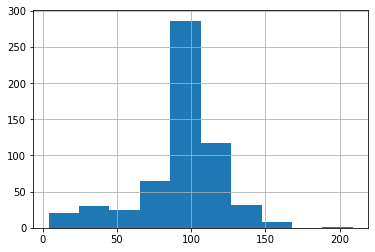

In [89]:
Netflix["Runtime"].hist()
plt.show()

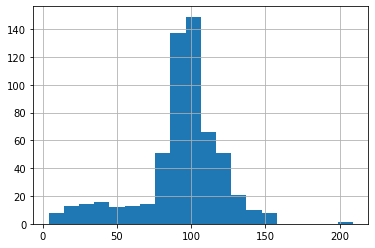

In [90]:
Netflix["Runtime"].hist(bins=20)
plt.show()

### Bar plot

In [97]:
# Bar plot can reveal relationship between a categorical variable and a numeric variable
avg_runtime_by_lang = Netflix.groupby("Language")["Runtime"].mean()
print(avg_runtime_by_lang)

Language
Bengali                        41.000000
Dutch                          99.666667
English                        91.817955
English/Akan                  136.000000
English/Arabic                114.000000
English/Hindi                  32.500000
English/Japanese               89.000000
English/Korean                121.000000
English/Mandarin               59.000000
English/Russian                90.000000
English/Spanish                39.200000
English/Swedish                40.000000
English/Taiwanese/Mandarin     91.000000
English/Ukranian/Russian       91.000000
Filipino                       99.500000
French                         92.700000
Georgian                       23.000000
German                         99.600000
Hindi                         115.787879
Indonesian                    103.777778
Italian                        98.357143
Japanese                       99.333333
Khmer/English/French          136.000000
Korean                        115.833333
Malay  

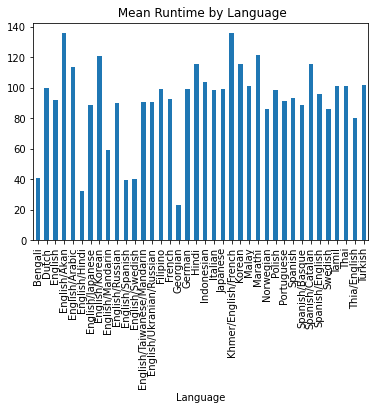

In [98]:
avg_runtime_by_lang.plot(kind="bar", title = " Mean Runtime by Language")
plt.show()

## LIne plot

In [120]:
## Pick only English rows to create the sample dataset

Netflix_en = Netflix[Netflix["Language"] =="English"]
Net_eng_runTime_date = Netflix_en.groupby("Premiere")["Runtime"].mean()
print(Net_eng_runTime_date)

Premiere
2014-12-13     81.0
2015-05-22     83.0
2015-05-29     84.0
2015-06-26     84.0
2015-07-17     80.0
              ...  
2021-05-07     98.0
2021-05-14    103.5
2021-05-21    148.0
2021-05-26     72.0
2021-05-27     95.0
Name: Runtime, Length: 305, dtype: float64


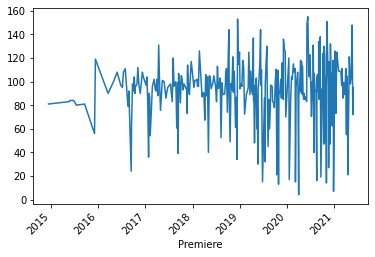

In [123]:
Net_eng_runTime_date.plot(kind="line", rot=45)
plt.show()

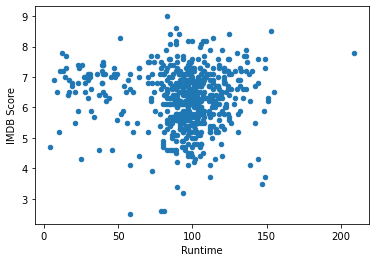

In [124]:
Netflix.plot(x="Runtime", y="IMDB Score",kind="scatter")
plt.show()

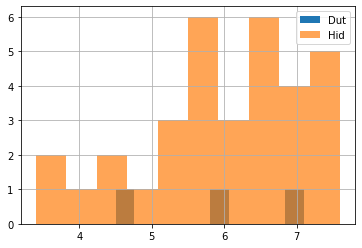

In [133]:
##. Layering plots
Netflix[Netflix["Language"] == "Dutch"]["IMDB Score"].hist()
Netflix[Netflix["Language"] == "Hindi"]["IMDB Score"].hist(alpha=0.7)
plt.legend(["Dut","Hid"])
plt.show()

## Missing vlaues 
- Show as NaN in Python (Not a Number)

In [134]:
Netflix.isna()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Prm_year
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
579,False,False,False,False,False,False,False
580,False,False,False,False,False,False,False
581,False,False,False,False,False,False,False
582,False,False,False,False,False,False,False


In [135]:
Netflix.isna().any()

Title         False
Genre         False
Premiere      False
Runtime       False
IMDB Score    False
Language      False
Prm_year      False
dtype: bool

In [136]:
Netflix.isna().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
Prm_year      0
dtype: int64

In [137]:
Netflix.dropna()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Prm_year
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020


In [138]:
Netflix.fillna(0)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Prm_year
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020


<AxesSubplot:>

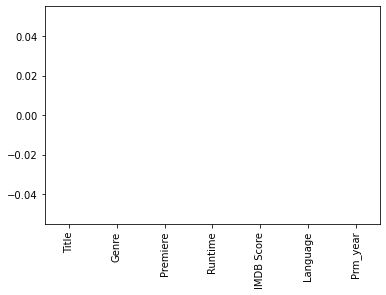

In [139]:
Netflix.isna().sum().plot(kind="bar")

## Creating dataframe
 - from a list of dictionaries: construced row by row 
 - from a dictionary of lists: constructed column by column

In [141]:
List_of_dicts = [
    {"name": "Ginger", "breed": "Dachshund", "height_cm": 22, "Weight_kg": 10, "date_of_birth": "2019-03-01"},
    {"name": "Scout", "breed": "Dalmatian", "height_cm": 59, "Weight_kg": 25, "date_of_birth": "2019-05-09"}
]
new_dogs = pd.DataFrame(List_of_dicts)
print(new_dogs)

     name      breed  height_cm  Weight_kg date_of_birth
0  Ginger  Dachshund         22         10    2019-03-01
1   Scout  Dalmatian         59         25    2019-05-09


In [142]:
Dict_of_lists ={
    "name": ["Ginger", "Scout"],
    "breed": ["Dachshund","Dalmatian"] ,
    "height_cm":[22, 59] , 
    "Weight_kg": [10, 25], 
    "date_of_birth": ["2019-03-01","2019-05-09"]
}

new_dogs_2 = pd.DataFrame(Dict_of_lists)
print(new_dogs_2)

     name      breed  height_cm  Weight_kg date_of_birth
0  Ginger  Dachshund         22         10    2019-03-01
1   Scout  Dalmatian         59         25    2019-05-09


## Reading and Writing CSVs

In [143]:
new_dogs_2.to_csv("new_dogs_2.csv")

## Check missing values

In [ ]:
# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()